## Guerneville Daily, all boundary conditions, all upstream subbasins

In [1]:
run_gridsearch = False
skip_best_model_validation = True
skip_best_model_test = True
testEnsembles = 5
gpuSetting = 0
hyperparam_csv_file = "guerneville_daily_allbasins_hyperparams.csv"

In [2]:
import sys
import os
import itertools
import pandas as pd
current_dir = os.getcwd()
print(current_dir)

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'C:\\Dino\\USACE\\UCB-USACE-LSTMs\\UCB_training\\models\\guerneville_all', 'C:\\Users\\Dino\\anaconda3\\python312.zip', 'C:\\Users\\Dino\\anaconda3\\DLLs', 'C:\\Users\\Dino\\anaconda3\\Lib', 'C:\\Users\\Dino\\anaconda3', '', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor']


In [4]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot
from UCB_training.UCB_utils import combinedPlotFromDf
from UCB_training.UCB_utils import fancyCombinedPlotFromDf

In [5]:
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

target_path = os.path.join(library_path, 'UCB_training', 'models', 'guerneville_all')

if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("guerneville")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all
Train Basin File Exists: True


In [6]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("guerneville_gage_allbasins.yaml")
path_to_physics_data = Path(library_path + "/russian_river_data/Guerneville_all_daily.csv")

In [7]:
features_with_physics = [
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    "Guerneville Gage FLOW",
    "Big Sulphur Cr ET-POTENTIAL",
    "Big Sulphur Cr FLOW",
    "Big Sulphur Cr FLOW-BASE",
    "Big Sulphur Cr INFILTRATION",
    "Big Sulphur Cr PERC-SOIL",
    "Big Sulphur Cr SATURATION FRACTION",
    "Dry Creek 10 ET-POTENTIAL",
    "Dry Creek 10 FLOW",
    "Dry Creek 10 FLOW-BASE",
    "Dry Creek 10 INFILTRATION",
    "Dry Creek 10 PERC-SOIL",
    "Dry Creek 10 SATURATION FRACTION",
    "Green Valley ET-POTENTIAL",
    "Green Valley FLOW",
    "Green Valley FLOW-BASE",
    "Green Valley INFILTRATION",
    "Green Valley PERC-SOIL",
    "Green Valley SATURATION FRACTION",
    "Laguna ET-POTENTIAL",
    "Laguna FLOW",
    "Laguna FLOW-BASE",
    "Laguna INFILTRATION",
    "Laguna PERC-SOIL",
    "Laguna SATURATION FRACTION",
    "Russian 20 ET-POTENTIAL",
    "Russian 20 FLOW",
    "Russian 20 FLOW-BASE",
    "Russian 20 INFILTRATION",
    "Russian 20 PERC-SOIL",
    "Russian 20 SATURATION FRACTION",
    "Russian 30 ET-POTENTIAL",
    "Russian 30 FLOW",
    "Russian 30 FLOW-BASE",
    "Russian 30 INFILTRATION",
    "Russian 30 PERC-SOIL",
    "Russian 30 SATURATION FRACTION",
    "Russian 40 ET-POTENTIAL",
    "Russian 40 FLOW",
    "Russian 40 FLOW-BASE",
    "Russian 40 INFILTRATION",
    "Russian 40 PERC-SOIL",
    "Russian 40 SATURATION FRACTION",
    "Russian 50 ET-POTENTIAL",
    "Russian 50 FLOW",
    "Russian 50 FLOW-BASE",
    "Russian 50 INFILTRATION",
    "Russian 50 PERC-SOIL",
    "Russian 50 SATURATION FRACTION",
    "Russian 60 ET-POTENTIAL",
    "Russian 60 FLOW",
    "Russian 60 FLOW-BASE",
    "Russian 60 INFILTRATION",
    "Russian 60 PERC-SOIL",
    "Russian 60 SATURATION FRACTION",
    "Russian 70 ET-POTENTIAL",
    "Russian 70 FLOW",
    "Russian 70 FLOW-BASE",
    "Russian 70 INFILTRATION",
    "Russian 70 PERC-SOIL",
    "Russian 70 SATURATION FRACTION",
    "Santa Rosa Cr 10 ET-POTENTIAL",
    "Santa Rosa Cr 10 FLOW",
    "Santa Rosa Cr 10 FLOW-BASE",
    "Santa Rosa Cr 10 INFILTRATION",
    "Santa Rosa Cr 10 PERC-SOIL",
    "Santa Rosa Cr 10 SATURATION FRACTION",
    "Santa Rosa Cr 20 ET-POTENTIAL",
    "Santa Rosa Cr 20 FLOW",
    "Santa Rosa Cr 20 FLOW-BASE",
    "Santa Rosa Cr 20 INFILTRATION",
    "Santa Rosa Cr 20 PERC-SOIL",
    "Santa Rosa Cr 20 SATURATION FRACTION",
    "WF Russian ET-POTENTIAL",
    "WF Russian FLOW",
    "WF Russian FLOW-BASE",
    "WF Russian INFILTRATION",
    "WF Russian PERC-SOIL",
    "WF Russian SATURATION FRACTION",
    # from Warm_Springs
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL',
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE',
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL',
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE',
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
]


In [8]:
hyperparam_space = {
    "hidden_size": [128, 256],
    "seq_length": [90, 180],
    "num_layers": [1],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
no_physics_results = []
physics_results = []

In [9]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"NoPhysics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=None,
            physics_informed=False,
            physics_data_file=None,
            hourly=False,
            extend_train_period=False,
            gpu=gpuSetting
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        no_physics_results.append(row_data)
    df_no_physics = pd.DataFrame(no_physics_results)
    df_no_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_no_physics.reset_index(drop=True, inplace=True)
else:
    print("Skipping Grid-Search")

Skipping Grid-Search


In [10]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"Physics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=features_with_physics,
            physics_informed=True,
            physics_data_file=path_to_physics_data,
            hourly=False,
            extend_train_period=False,
            gpu=gpuSetting
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        physics_results.append(row_data)
    df_physics = pd.DataFrame(physics_results)
    df_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_physics.reset_index(drop=True, inplace=True)
    best_no_phys = df_no_physics.iloc[0].to_dict()
    best_phys = df_physics.iloc[0].to_dict()
    best_no_phys["model_type"] = "no_physics"
    best_phys["model_type"] = "physics"
    best_params_df = pd.DataFrame([best_no_phys, best_phys])
    best_params_df.to_csv(hyperparam_csv_file, index=False)
else:
    print("Skipping Grid-Search")

Skipping Grid-Search


In [11]:
if os.path.exists(hyperparam_csv_file):
    best_params_df = pd.read_csv(hyperparam_csv_file)
    best_no_phys = best_params_df.query("model_type == 'no_physics'").iloc[0].to_dict()
    best_phys = best_params_df.query("model_type == 'physics'").iloc[0].to_dict()

    best_no_physics_params = {
        "epochs": int(best_no_phys["epochs"]),
        "hidden_size": int(best_no_phys["hidden_size"]),
        "seq_length": int(best_no_phys["seq_length"]),
        "num_layers": int(best_no_phys["num_layers"]),
        "output_dropout": float(best_no_phys["output_dropout"]),
    }

    best_physics_params = {
        "epochs": int(best_phys["epochs"]),
        "hidden_size": int(best_phys["hidden_size"]),
        "seq_length": int(best_phys["seq_length"]),
        "num_layers": int(best_phys["num_layers"]),
        "output_dropout": float(best_phys["output_dropout"]),
    }

In [12]:
if run_gridsearch:
    print(df_no_physics.iloc[0:9])
    df_no_physics.to_csv("guerneville_daily_allbasins_no_physics_gridsearch.csv", index=False)

In [13]:
if run_gridsearch:
    print(df_physics.iloc[0:9])
    df_physics.to_csv("guerneville_daily_allbasins_physics_gridsearch.csv", index=False)

### Re-run validation with best hyperparameters

In [14]:
if not skip_best_model_validation:
    lstmNoPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=False,
        gpu=gpuSetting
    )
    lstmNoPhysicsValBest.train()
    no_physics_val_csv, no_physics_val_metrics = lstmNoPhysicsValBest.results()
    no_physics_val_metrics

In [15]:
if not skip_best_model_validation:
    lstmPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=False,
        gpu=gpuSetting
    )
    lstmPhysicsValBest.train()
    physics_val_csv, physics_val_metrics = lstmPhysicsValBest.results()
    physics_val_metrics

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprec

[INFO] Wrote metrics CSV: guerneville_daily_allbasins_val_metrics.csv


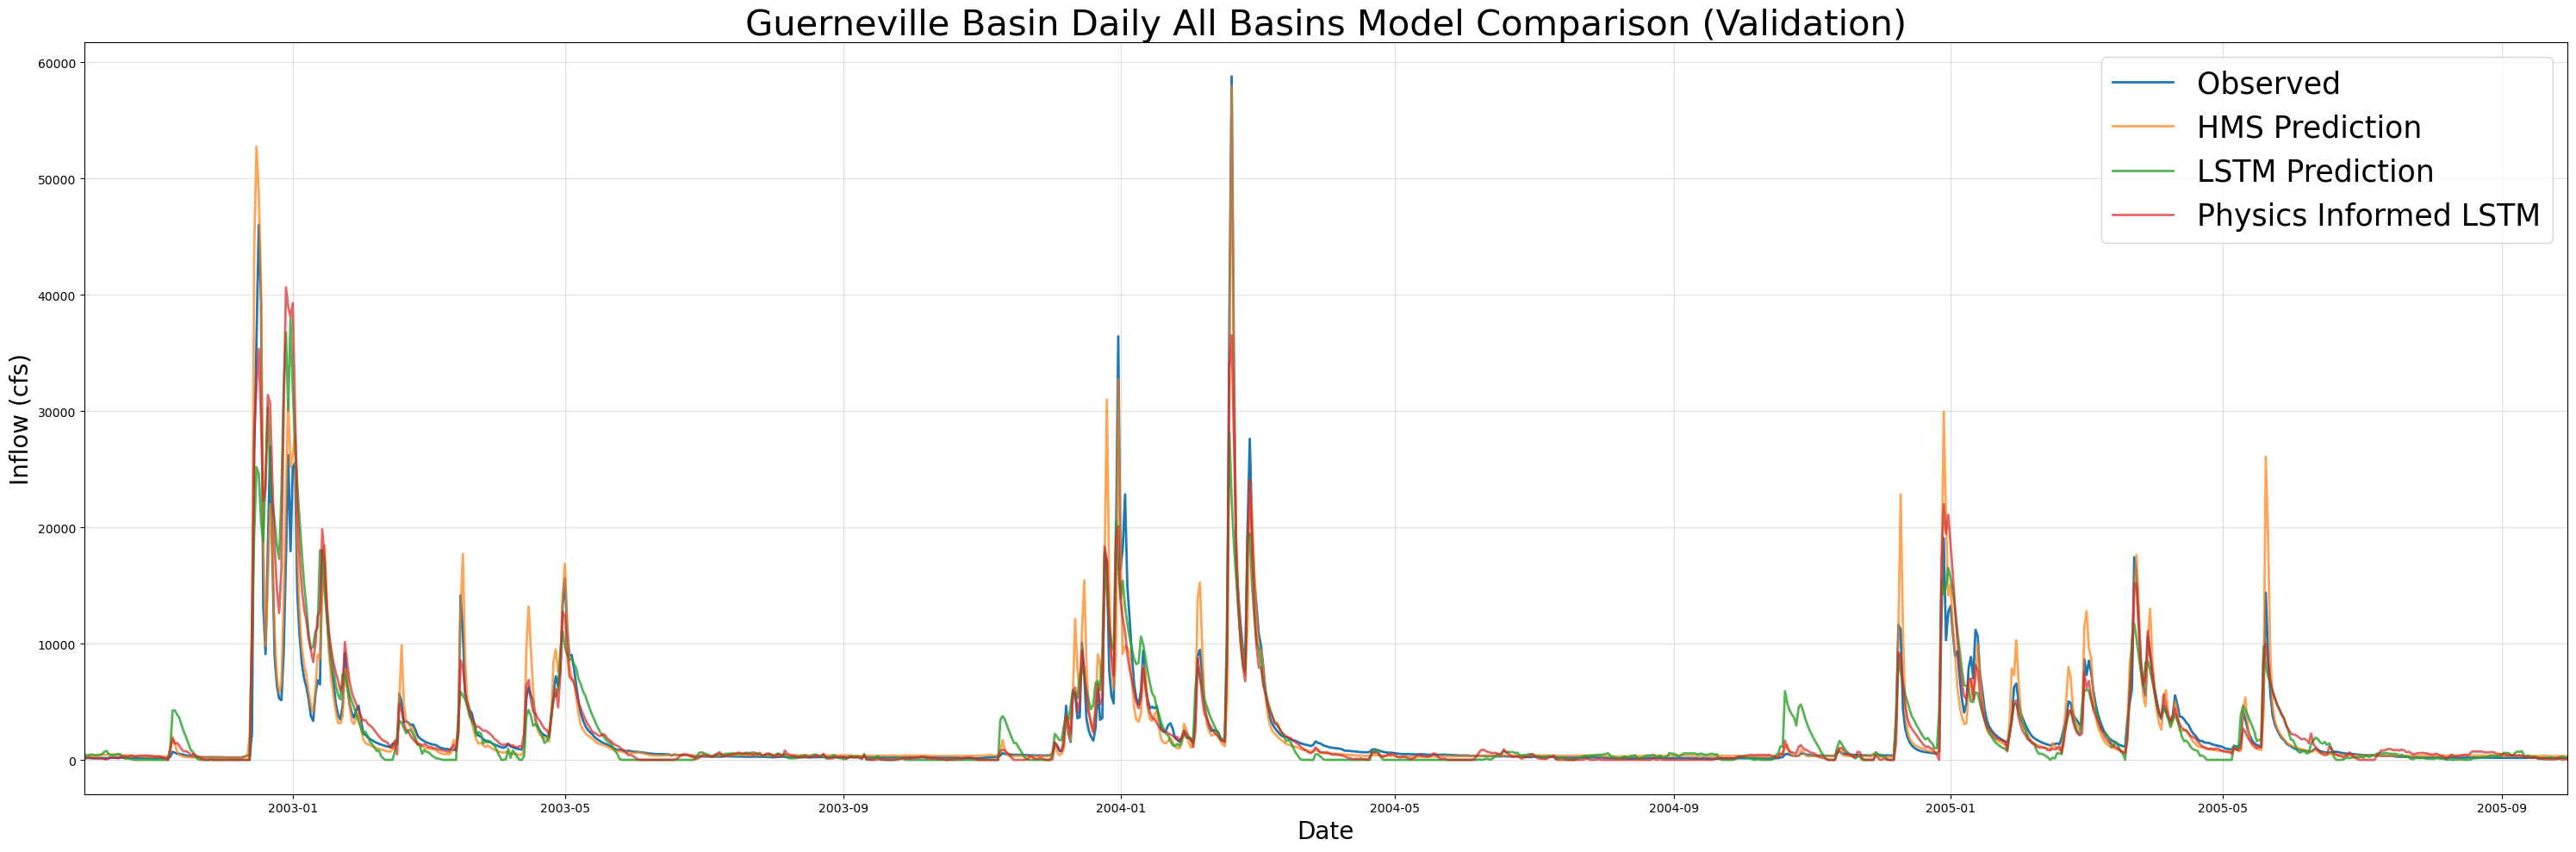

In [16]:
if not skip_best_model_validation:
    combinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Basin Daily All Basins Model Comparison (Validation)",
        fName="guerneville_daily_allbasins_val_metrics.csv",
        plot_filename="guerneville_daily_allbasins_val_model_comparison.png",
        timeseries_filename ="guerneville_daily_allbasins_val_combined_ts.csv"
    )
else:
    combined_df = pd.read_csv("guerneville_daily_allbasins_val_combined_ts.csv")
    combinedPlotFromDf(combined_df, title="Guerneville Basin Daily All Basins Model Comparison (Validation)", fName="guerneville_daily_allbasins_val_metrics.csv")

In [17]:
if not skip_best_model_validation:
    fancyCombinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,
        title='Guerneville Basin Daily No Boundary Model Comparison (Validation)',
        fName="guerneville_daily_allbasins_val_metrics.csv",
        timeseries_filename ="guerneville_daily_allbasins_val_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(combined_df, title='Guerneville Basin Daily All Basins Model Comparison (Validation)', 
                            fName="guerneville_daily_allbasins_val_metrics.csv")

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprec

[INFO] Wrote metrics CSV: guerneville_daily_allbasins_val_metrics.csv


In [18]:
if skip_best_model_validation:
    val_metrics = pd.read_csv("guerneville_daily_allbasins_val_metrics.csv", index_col=0)
    print(val_metrics)

                      HMS          LSTM  Physics_Informed_LSTM
NSE          8.819593e-01  6.980810e-01           8.075019e-01
MSE          2.922176e+06  7.474206e+06           4.765418e+06
RMSE         1.709437e+03  2.733899e+03           2.182984e+03
KGE          8.769167e-01  8.358706e-01           8.860058e-01
Alpha-NSE    1.099693e+00  9.586920e-01           1.047523e+00
Beta-KGE     1.053143e+00  1.027295e+00           1.050418e+00
Beta-NSE     2.564997e-02  1.317411e-02           2.433483e-02
Pearson-r    9.511482e-01  8.435165e-01           9.094782e-01
FHV          1.141927e+01 -8.620038e+00           6.779542e+00
FMS         -1.806008e+01  3.638959e+01           4.942778e+00
FLV          7.360162e+00 -4.974248e+02          -1.515501e+03
Peak-Timing  2.000000e-01  1.200000e+00           2.000000e-01
Peak-MAPE    3.080989e+01  4.303580e+01           2.548643e+01
PBIAS       -5.314326e+00 -2.729496e+00          -5.041846e+00


### Re-run testing with best hyperparameters

In [19]:
if not skip_best_model_test:
    lstmNoPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=True,  
        num_ensemble_members = testEnsembles,
        gpu=gpuSetting
    )
    
    lstmNoPhysicsExtBest.train()
    no_physics_test_csv, no_physics_test_metrics = lstmNoPhysicsExtBest.results('test')
    no_physics_test_metrics

In [20]:
if not skip_best_model_test:
    lstmPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=True,
        num_ensemble_members = testEnsembles,
        gpu=gpuSetting
    )
    
    lstmPhysicsExtBest.train()
    physics_test_csv, physics_test_metrics = lstmPhysicsExtBest.results('test')
    physics_test_metrics

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\

[INFO] Wrote metrics CSV: guerneville_daily_allbasins_test_metrics_TE.csv


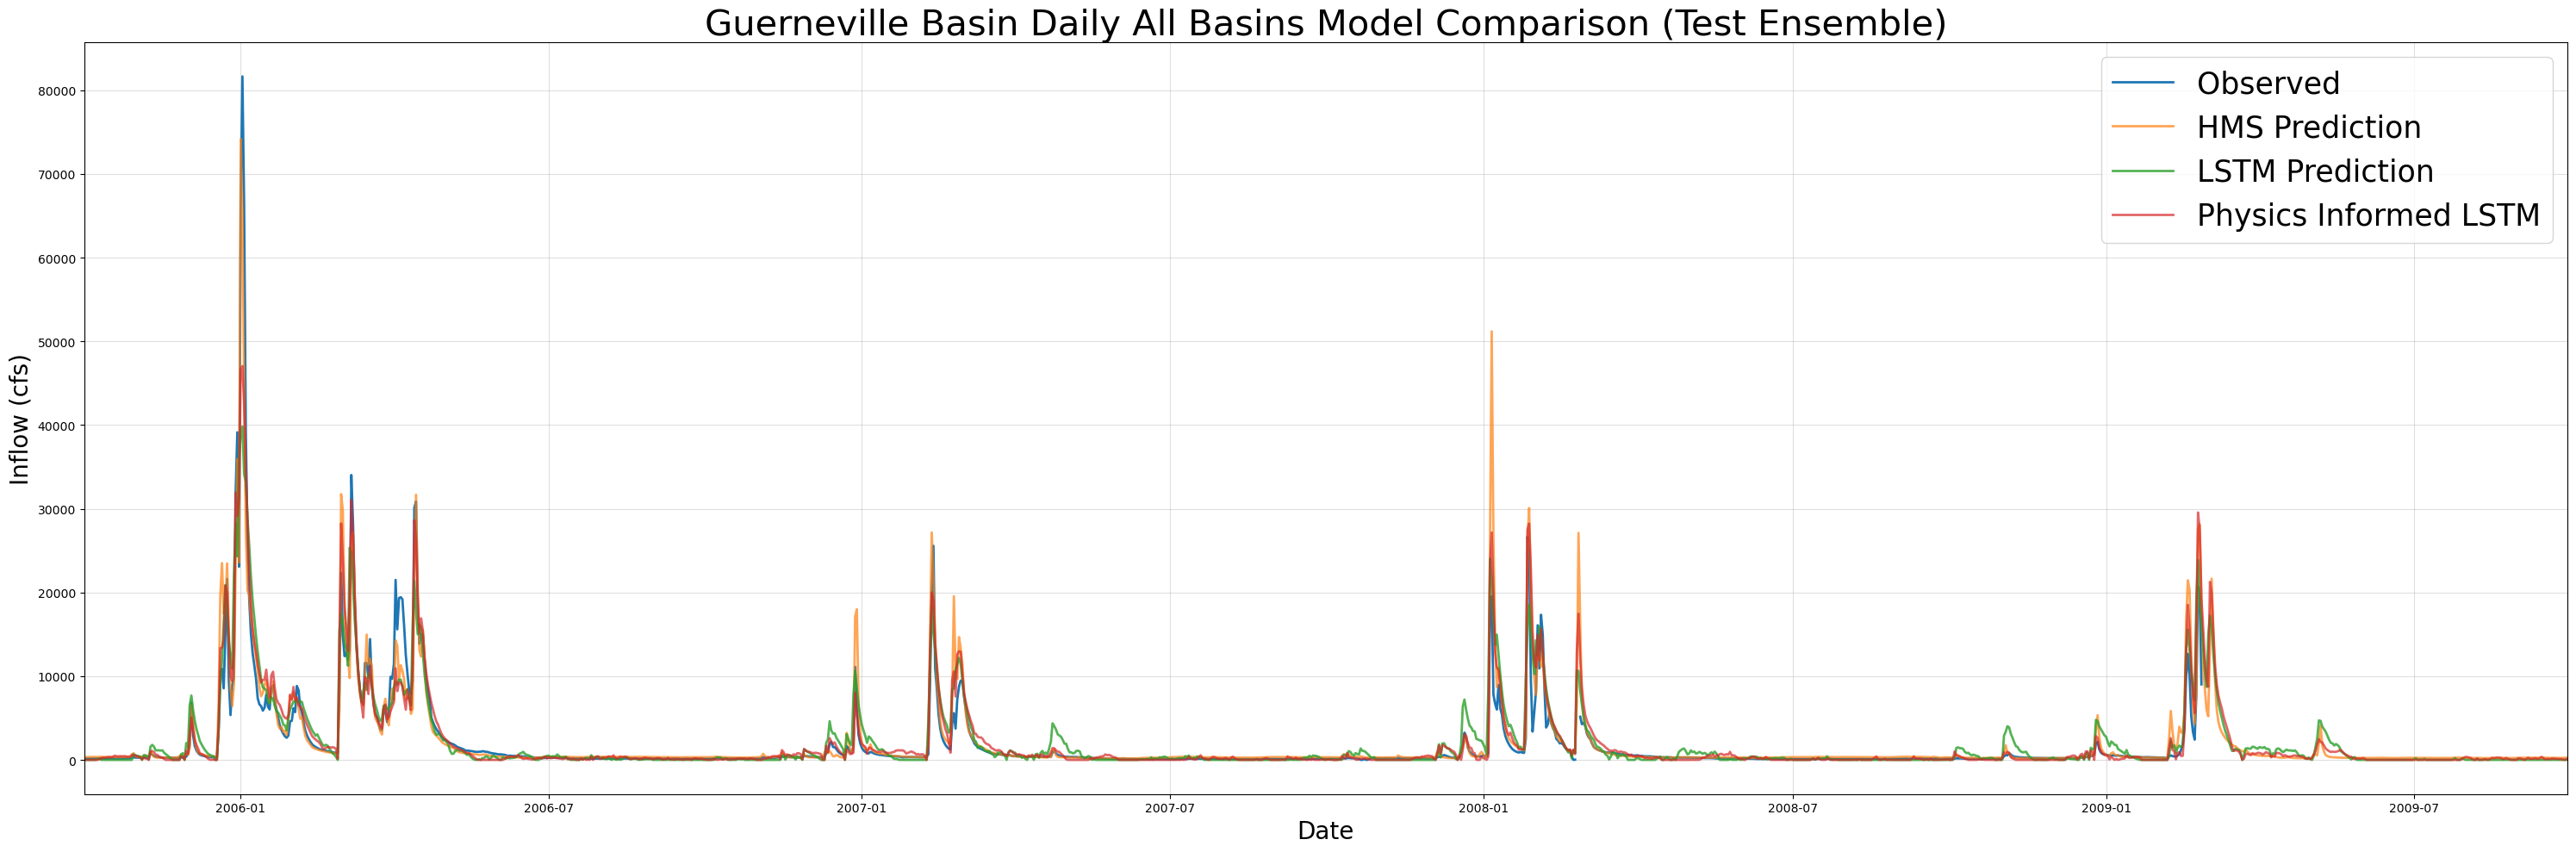

In [21]:
if not skip_best_model_test:
    combinedPlot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Basin Daily All Basins Model Comparison (Test Ensemble)",
        fName="guerneville_daily_allbasins_test_metrics_TE.csv",
        plot_filename="guerneville_daily_allbasins_model_comparison_TE.png",
        timeseries_filename ="guerneville_daily_allbasins_test_combined_TE_ts.csv"
    )
else:
    combined_df = pd.read_csv("guerneville_daily_allbasins_test_combined_TE_ts.csv")
    combinedPlotFromDf(combined_df, title="Guerneville Basin Daily All Basins Model Comparison (Test Ensemble)", fName="guerneville_daily_allbasins_test_metrics_TE.csv")

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

C:\Dino\USACE\UCB-USACE-LSTMs\UCB_training\models\

[INFO] Wrote metrics CSV: guerneville_daily_allbasins_test_metrics_TE.csv


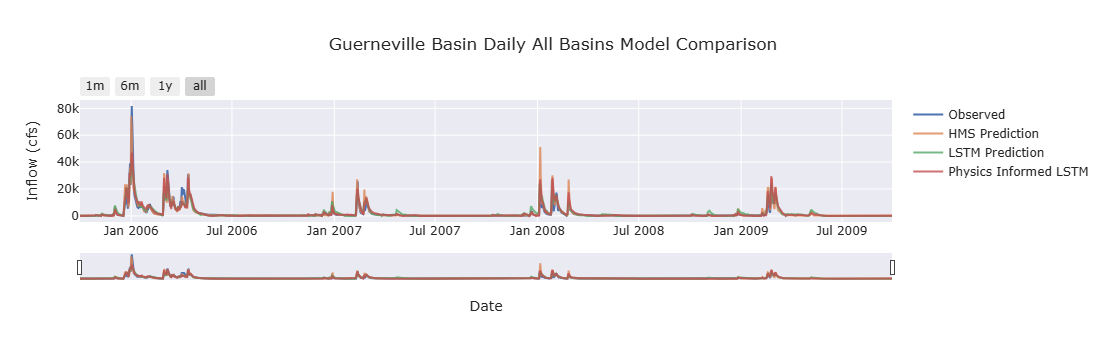

In [22]:
if not skip_best_model_test:
    fancyCombinedPlot(lstm_results=no_physics_test_csv, lstmPhysics_results= physics_test_csv, HMS_results=path_to_physics_data, title='Guerneville Basin Daily All Basins Model Comparison (Test Ensemble)', fName = "guerneville_daily_allbasins_test_metrics_TE.csv", timeseries_filename ="guerneville_daily_allbasins_test_combined_TE_ts.csv")
else:
    fancyCombinedPlotFromDf(combined_df, title='Guerneville Basin Daily All Basins Model Comparison', fName = "guerneville_daily_allbasins_test_metrics_TE.csv")

In [23]:
test_metrics = pd.read_csv("guerneville_daily_allbasins_test_metrics_TE.csv", index_col=0)
print(test_metrics)

                      HMS          LSTM  Physics_Informed_LSTM
NSE          8.499265e-01  7.888309e-01           8.605959e-01
MSE          4.619520e+06  6.500147e+06           4.291097e+06
RMSE         2.149307e+03  2.549539e+03           2.071496e+03
KGE          8.429764e-01  7.771542e-01           8.593722e-01
Alpha-NSE    1.026759e+00  8.505176e-01           9.362040e-01
Beta-KGE     1.137158e+00  1.123432e+00           1.102867e+00
Beta-NSE     4.800851e-02  4.320407e-02           3.600600e-02
Pearson-r    9.283899e-01  8.900919e-01           9.284143e-01
FHV          2.575217e+00 -1.912986e+01          -6.537801e+00
FMS         -2.428297e+01  9.725741e+02           8.951096e+01
FLV          9.758513e+01  1.000000e+02           8.642018e+01
Peak-Timing  7.500000e-01  7.500000e-01           7.500000e-01
Peak-MAPE    1.465164e+01  3.864213e+01           2.591060e+01
PBIAS       -1.371581e+01 -1.234320e+01          -1.028675e+01
